Pandas

In [ ]:
import pandas as pd
import numpy as np

Panda Series

# Pandas Series – Quick Reference

| Feature / Concept        | Description                                                                 | Example Code |
|---------------------------|-----------------------------------------------------------------------------|--------------|
| Definition               | One-dimensional labeled array in Pandas.                                    | `pd.Series([1,2,3])` |
| Data Types               | Can hold int, float, string, objects.                                       | `pd.Series([10, 3.14, "hello"])` |
| Index                    | Labels assigned to elements (default: 0…n-1).                               | `pd.Series([1,2,3], index=["a","b","c"])` |



In [ ]:
# 1. Create Series with default labels (0,1,2,...)
s1 = pd.Series([100, 200, 300])
print("Series with default labels:\n", s1)

# 2. Create Series with custom labels
s2 = pd.Series([10, 20, 30], index=["a", "b", "c"])
print("\nSeries with custom labels:\n", s2)

dict = {"Mukul":0,"Surbhi":1}
dict_series = pd.Series(dict)
print("\nSeries with custom labels:\n", dict_series)

Data Frame

| Feature / Concept        | Description                                                                 | Example Code |
|---------------------------|-----------------------------------------------------------------------------|--------------|
| Definition               | 2D labeled data structure with rows & columns (like a table).               | `pd.DataFrame(...)` |
| Data Types               | Each column can have different data types.                                  | Numbers, strings, objects |
| From Dict of Lists       | Create DataFrame from dictionary where keys = column names.                 | `pd.DataFrame({"A":[1,2], "B":[3,4]})` |
| From List of Dicts       | Each dict is a row.                                                         | `pd.DataFrame([{"A":1,"B":2},{"A":3,"B":4}])` |
| From 2D List / Array     | Rows and columns can be created from list of lists or numpy array.           | `pd.DataFrame([[1,2],[3,4]], columns=["A","B"])` |
| Index (Row Labels)       | Default is 0…n-1 but can set custom row labels.                             | `pd.DataFrame(..., index=["row1","row2"])` |
| Column Labels            | Default from dictionary keys or provided manually.                          | `columns=["A","B"]` |

In [ ]:
# 1. Create DataFrame from dictionary of lists
df1 = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["NY", "LA", "Chicago"]
})
print("DataFrame from dictionary of lists:\n", df1)

# 2. Create DataFrame from list of dictionaries
df2 = pd.DataFrame([
    {"A": 1, "B": 2},
    {"A": 3, "B": 4}
])
print("\nDataFrame from list of dictionaries:\n", df2)

# 3. Create DataFrame from 2D list
df3 = pd.DataFrame([[10,20],[30,40]], columns=["Col1","Col2"], index=["row1","row2"])
print("\nDataFrame from 2D list with custom index:\n", df3)

arr = np.array([(1,2),(3,4)], dtype=[("A","i4"),("B","i4")])
df5 = pd.DataFrame(arr)
print("\nFrom numpy structured array:\n", df5)

Operation in Data Frame

| Operation                  | Description                                                                 | Example Code |
|-----------------------------|-----------------------------------------------------------------------------|--------------|
| Select Single Column       | Access like dictionary or attribute.                                        | `df["A"]` |
| Select Multiple Columns    | Pass a list of column names.                                                | `df[["A","B"]]` |
| Add New Column             | Assign a list/Series/operation result.                                      | `df["E"] = [10,20,30]` |
| Remove Column (drop)       | Remove by specifying `axis=1`.                                              | `df.drop("A", axis=1)` |
| Drop with inplace          | If `inplace=True`, changes original df (no new copy).                       | `df.drop("A", axis=1, inplace=True)` |
| Axis Meaning               | `axis=0` → rows, `axis=1` → columns.                                        | `df.drop(0, axis=0)` |
| Select Row (loc)           | Select row(s) by label.                                                     | `df.loc[0]` |
| Select Row (iloc)          | Select row(s) by position.                                                  | `df.iloc[1]` |
| Select Specific Element    | Access using row & column.                                                  | `df.loc[1,"A"]`, `df.iloc[1,0]` |
| Conditional Selection      | Apply condition to filter rows.                                             | `df[df["A"] > 5]` |


In [ ]:

# Sample DataFrame
data = {
    "A": [1, 2, 3],
    "B": [4, 5, 6],
    "C": [7, 8, 9],
    "D": [10, 11, 12]
}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# 1. Select single column
print("\nSelect single column A:\n", df["A"])

# 2. Select multiple columns
print("\nSelect multiple columns A and C:\n", df[["A", "C"]])

# 3. Add a new column
df["E"] = [100, 200, 300]
print("\nAfter adding new column E:\n", df)

# 4. Remove a column (returns new DataFrame, does not change original)
df_dropped = df.drop("E", axis=1)
print("\nDataFrame after dropping column E (not inplace):\n", df_dropped)

# 5. Drop with inplace (modifies original)
df.drop("E", axis=1, inplace=True)
print("\nAfter dropping column E (inplace=True):\n", df)

# 6. Axis explanation
# axis=0 -> row operation
df_row_dropped = df.drop(0, axis=0)  # drop row with index 0
print("\nAfter dropping row 0 (axis=0):\n", df_row_dropped)

# axis=1 -> column operation
df_col_dropped = df.drop("A", axis=1)  # drop column A
print("\nAfter dropping column A (axis=1):\n", df_col_dropped)

# 7. Select row
print("\nSelect row at index 1 using loc:\n", df.loc[1])
print("Select row at position 2 using iloc:\n", df.iloc[2])

# 8. Select specific element
print("\nElement at row 1, column B using loc:", df.loc[1, "B"])
print("Element at row 1, column 1 using iloc:", df.iloc[1, 1])

# 9. Conditional selection
print("\nRows where column B > 4:\n", df[df["B"] > 4])

Merge,Concat

In [ ]:
import pandas as pd

# DataFrame 1
df1 = pd.DataFrame({
    "id": [1, 2, 3],
    "name": ["Alice", "Bob", "Charlie"]
})

# DataFrame 2
df2 = pd.DataFrame({
    "id": [1, 2, 4],
    "city": ["New York", "London", "Paris"]
})

# Merge on "id"
merged = pd.merge(df1, df2, on="id", how="inner")  # default is inner join
print(merged)


# 📘 Theory: GroupBy and Aggregate in Pandas

| Concept     | Explanation                                                                 |
|-------------|-----------------------------------------------------------------------------|
| **groupby()**   | Splits data into groups based on one or more keys (like SQL `GROUP BY`).   |
| **aggregate()** | Applies one or more functions (`sum`, `mean`, `count`, etc.) to each group. |
| **Syntax**      | `df.groupby("column").agg({"col1":"func1", "col2":"func2", ...})`         |
| **Use Case**    | Useful for summarizing, reporting, and analyzing grouped data.            |

📌 **Example**:
In a store sales dataset, we may want **total sales per product** or **per region**.


In [ ]:

import pandas as pd

# 🔹 Step 1: Create sample store sales data
data = {
    "Store": ["A", "A", "A", "B", "B", "C", "C", "C", "C"],
    "Product": ["Apples", "Bananas", "Apples", "Bananas", "Apples", "Bananas", "Apples", "Bananas", "Apples"],
    "Sales": [100, 150, 200, 300, 250, 100, 120, 180, 160],
    "Quantity": [10, 15, 20, 30, 25, 10, 12, 18, 16],
}

df = pd.DataFrame(data)
print("📊 Store Sales Data:")
print(df)

# 🔹 Step 2: Group by Store and aggregate Sales & Quantity
grouped = df.groupby("Store")["Sales"].sum()

print("\n📊 Total Sales and Quantity by Store:")
print(grouped)

# 🔹 Step 3: Group by Product and apply multiple aggregations
product_stats = df.groupby("Product").agg({
    "Sales": ["sum", "mean", "max"],
    "Quantity": ["sum", "mean"]
}).reset_index()

print("\n📊 Sales and Quantity Aggregations by Product:")
print(product_stats)



# 📘 Theory: Pivot Table in Pandas

| Concept        | Explanation                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `pivot_table()`| Reshapes and summarizes data like Excel Pivot Tables.                       |
| **index**      | Row grouping (e.g., Store, Region).                                         |
| **columns**    | Column grouping (e.g., Product, Category).                                  |
| **values**     | Data to aggregate (e.g., Sales, Quantity).                                  |
| **aggfunc**    | Aggregation function: sum, mean, max, min, count, etc.                      |
| **fill_value** | Replaces missing values (NaN) with a chosen value (often 0).                |
| **Use Case**   | Summarizing large datasets for reporting and analysis.                      |

✅ **Syntax**:
```python
pd.pivot_table(df, values="col", index="col1", columns="col2", aggfunc="sum")


In [1]:

import pandas as pd

# 🔹 Step 1: Create sample store sales data
data = {
    "Store": ["A", "A", "A", "B", "B", "C", "C", "C", "C"],
    "Product": ["Apples", "Bananas", "Apples", "Bananas", "Apples", "Bananas", "Apples", "Bananas", "Apples"],
    "Sales": [100, 150, 200, 300, 250, 100, 120, 180, 160],
    "Quantity": [10, 15, 20, 30, 25, 10, 12, 18, 16],
}

df = pd.DataFrame(data)
print("📊 Store Sales Data:")
print(df)

# 🔹 Step 2: Pivot Table (Sales by Store & Product)
pivot_sales = pd.pivot_table(
    df,
    values="Sales",
    index="Store",
    columns="Product",
    aggfunc="sum",
    fill_value=0
)

print("\n📊 Pivot Table: Total Sales by Store and Product")
print(pivot_sales)

# 🔹 Step 3: Pivot with multiple values (Sales & Quantity)
pivot_multi = pd.pivot_table(
    df,
    values=["Sales", "Quantity"],
    index="Store",
    columns="Product",
    aggfunc={"Sales": "sum", "Quantity": "sum"},
    fill_value=0
)

print("\n📊 Pivot Table: Sales & Quantity by Store and Product")
print(pivot_multi)


📊 Store Sales Data:
  Store  Product  Sales  Quantity
0     A   Apples    100        10
1     A  Bananas    150        15
2     A   Apples    200        20
3     B  Bananas    300        30
4     B   Apples    250        25
5     C  Bananas    100        10
6     C   Apples    120        12
7     C  Bananas    180        18
8     C   Apples    160        16

📊 Pivot Table: Total Sales by Store and Product
Product  Apples  Bananas
Store                   
A           300      150
B           250      300
C           280      280

📊 Pivot Table: Sales & Quantity by Store and Product
        Quantity          Sales        
Product   Apples Bananas Apples Bananas
Store                                  
A             30      15    300     150
B             25      30    250     300
C             28      28    280     280


# 📘 Theory: Data Preprocessing in Machine Learning

| Step                     | Explanation                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| 1. Handle Missing Values  | Replace NaN with mean/median/mode or drop rows/columns with too many NaNs. |
| 2. Handle Duplicates      | Remove duplicate rows to avoid bias.                                        |
| 3. Encoding Categorical   | Convert categorical variables → numbers (One-Hot, Label Encoding).         |
| 4. Feature Scaling        | Normalize/Standardize numeric data for ML models (e.g., MinMaxScaler).     |
| 5. Outlier Detection      | Identify extreme values using IQR/Z-score and handle them if needed.       |
| 6. Train-Test Split       | Split dataset into training & testing sets for evaluation.                 |

✅ **Goal:** Make raw data clean, consistent, and ready for modeling.


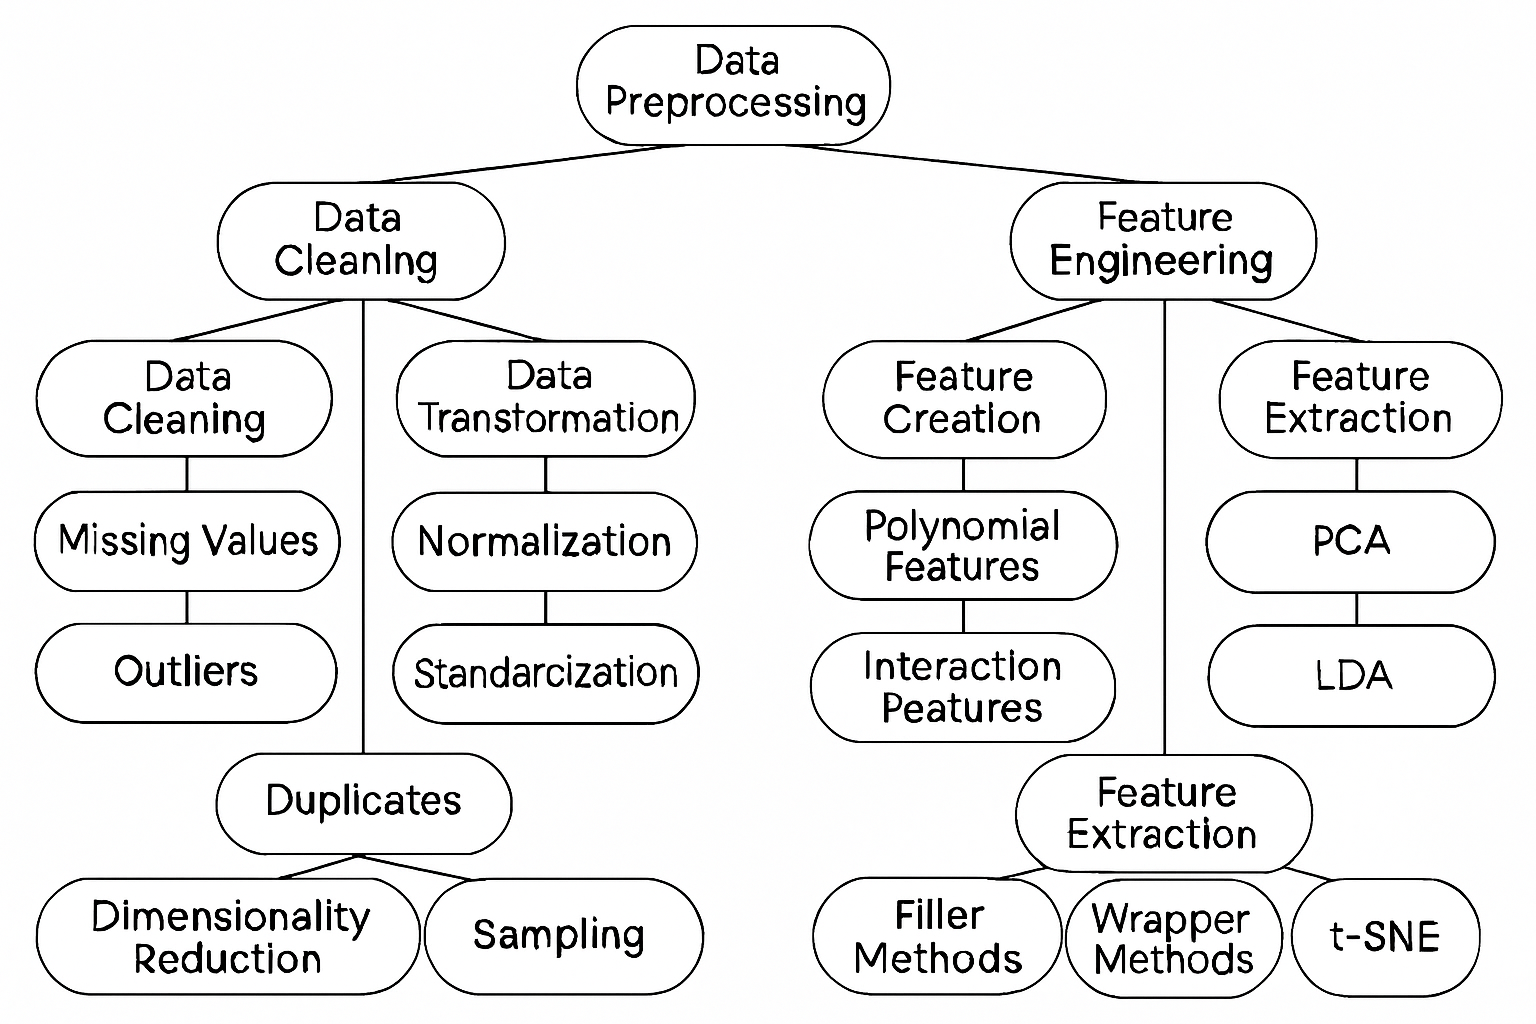

In [12]:
from IPython.display import Image
Image(r"C:\Basic_Datascience_4ML\assets\static\img.png")
